In [2]:
#Imports:
#General imports
import numpy as np
import pandas as pd



# Plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

In [3]:
#Imports:
#Sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

#Other models
from xgboost import XGBClassifier


#Sklearn metrics
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

/Users/mauriciomoreno/opt/anaconda3/envs/capstone/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [5]:
def nan_vis(df):
    """
    Visualizes missing values in a DataFrame.

    Parameters:
    - df (pandas.DataFrame): The input DataFrame.

    Returns:
    - str: A message indicating if there are any missing values or not.
    - If there are missing values, returns a bar graph with the missing values.
    """

    # Visualize missing values
    if df.isna().sum().sum() == 0:
        return "There are no missing values"
    else:
        plt.figure(figsize=(10, 6))
        plt.title("Missing Values")
        ax = sns.barplot(x=df.columns, y=df.isna().sum())
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        plt.xlabel("Columns")
        plt.ylabel("Missing Values Count")
        plt.show()

In [4]:
dfmodel = pd.read_csv('../data/elenas-it2-postpreprocessing.csv')

In [6]:
nan_vis(dfmodel)

'There are no missing values'

In [7]:

dfmodel["churn"].value_counts()

1    38760
0     8944
Name: churn, dtype: int64

In [11]:
dfmodel.drop(["seller_created_at"], axis=1, inplace=True)

In [12]:
#Splitting the variables
X = dfmodel.drop(columns="churn")
y = dfmodel["churn"]

#Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=24)

In [13]:
#Fitting the train model
baseline_dt = DecisionTreeClassifier(max_depth=2)
baseline_cv = cross_val_score(baseline_dt, X_train, y_train, cv=5)
baseline_fitted = baseline_dt.fit(X_train, y_train)


In [14]:
#Baseline scores:

# Predict labels
y_pred = baseline_fitted.predict(X_test)

# Accuracy, Precision, recall, and F1-score
accuracy = baseline_fitted.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"""
- Baseline accuracy: {accuracy}
- Baseline recall: {recall}
- Baseline precision: {precision}
- Baseline f1: {f1}
""")


- Baseline accuracy: 0.8816685881983021
- Baseline recall: 0.9872291021671826
- Baseline precision: 0.8813774041229989
- Baseline f1: 0.9313051414663827



In [15]:
#Check for overfitting
print(f"overfitting - train model score: {baseline_fitted.score(X_train, y_train)}")

overfitting - train model score: 0.882137148547022


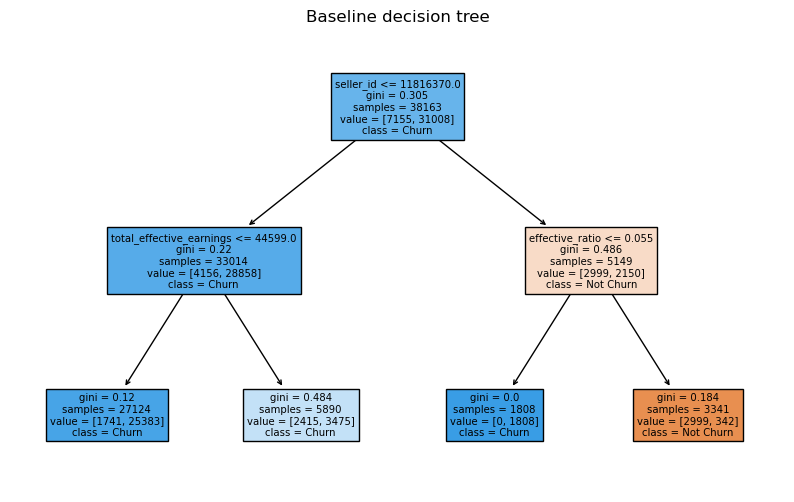

In [23]:
# Plot the decision tree
plt.figure(figsize=(10, 6))
plot_tree(baseline_fitted, feature_names=X_train.columns, filled=True, class_names=["Not Churn", "Churn"], impurity=True)
plt.title("Baseline decision tree")
plt.show()

## Random Forest

Iteration 1
{'model': RandomForestClassifier(max_depth=200),
 'model__max_depth': 200,
 'normalise': StandardScaler(),
 'select': None}

- Baseline accuracy: 0.9391049156272927
- Baseline recall: 0.9837461300309598
- Baseline precision: 0.943695087241678
- Baseline f1: 0.9633044906208552

overfitting - train model score: 1.0

There is already overfitting


 

In [24]:
#Random Forest gridsearch:
estimators = [
    ("normalise", StandardScaler()),
    ("select", PCA()),
    ("model", RandomForestClassifier())
]

pipe = Pipeline(estimators)

param_grid = [
    {
        'model': [RandomForestClassifier()],
        'normalise': [StandardScaler(), None],
        'model__max_depth': [10, 50, 100, 200],
        'select':  [PCA(n_components=0.9), None],
    }]

grid = GridSearchCV(pipe, param_grid, cv=5, verbose=1)
rf_fitted_grid = grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [25]:
rf_fitted_grid.best_params_

{'model': RandomForestClassifier(max_depth=200),
 'model__max_depth': 200,
 'normalise': StandardScaler(),
 'select': None}

In [26]:
#DT iteration 1

# Predict labels
y_pred = rf_fitted_grid.predict(X_test)

# Accuracy, Precision, recall, and F1-score
accuracy = rf_fitted_grid.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"""
- Baseline accuracy: {accuracy}
- Baseline recall: {recall}
- Baseline precision: {precision}
- Baseline f1: {f1}
""")


- Baseline accuracy: 0.9391049156272927
- Baseline recall: 0.9837461300309598
- Baseline precision: 0.943695087241678
- Baseline f1: 0.9633044906208552



In [27]:
print(f"overfitting - train model score: {rf_fitted_grid.score(X_train, y_train)}")

overfitting - train model score: 1.0


## Random Forest optimization:

In [30]:
## Parameters

depths = np.arange(0,250, 25)

accuracy_test = []
accuracy_train = []



[  0  25  50  75 100 125 150 175 200 225]
